# Bike Rental Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from patsy import dmatrices
from statsmodels import api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
bike_data = pd.read_csv("./day.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
bike_data = bike_data.drop(['instant'], axis = 1)
bike_data.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [4]:
bike_data.columns = ['Date', 'Season', 'Year', 'Month', 'Holiday', 'Day_of_week', 'Working_day', 'Weather_situation',
        'Temperature_0', 'Temperature_1', 'Humidity', 'Windspeed', 'Casual_users', 'Registered_users', 'Total_count']

In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
Date                 731 non-null object
Season               731 non-null int64
Year                 731 non-null int64
Month                731 non-null int64
Holiday              731 non-null int64
Day_of_week          731 non-null int64
Working_day          731 non-null int64
Weather_situation    731 non-null int64
Temperature_0        731 non-null float64
Temperature_1        731 non-null float64
Humidity             731 non-null float64
Windspeed            731 non-null float64
Casual_users         731 non-null int64
Registered_users     731 non-null int64
Total_count          731 non-null int64
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [6]:
bike_data.Date = pd.to_datetime(bike_data.Date)

In [7]:
print('Unique value count for each feature:')
for i in bike_data:
    print(i, '-->', bike_data[i].unique().size)

Unique value count for each feature:
Date --> 731
Season --> 4
Year --> 2
Month --> 12
Holiday --> 2
Day_of_week --> 7
Working_day --> 2
Weather_situation --> 3
Temperature_0 --> 499
Temperature_1 --> 690
Humidity --> 595
Windspeed --> 650
Casual_users --> 606
Registered_users --> 679
Total_count --> 696


In [8]:
bike_data.Season = bike_data.Season.astype('category')
bike_data.Year = bike_data.Year.astype('category')
bike_data.Month = bike_data.Month.astype('category')
bike_data.Holiday = bike_data.Holiday.astype('category')
bike_data.Day_of_week = bike_data.Day_of_week.astype('category')
bike_data.Working_day = bike_data.Working_day.astype('category')
bike_data.Weather_situation = bike_data.Weather_situation.astype('category')

In [9]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
Date                 731 non-null datetime64[ns]
Season               731 non-null category
Year                 731 non-null category
Month                731 non-null category
Holiday              731 non-null category
Day_of_week          731 non-null category
Working_day          731 non-null category
Weather_situation    731 non-null category
Temperature_0        731 non-null float64
Temperature_1        731 non-null float64
Humidity             731 non-null float64
Windspeed            731 non-null float64
Casual_users         731 non-null int64
Registered_users     731 non-null int64
Total_count          731 non-null int64
dtypes: category(7), datetime64[ns](1), float64(4), int64(3)
memory usage: 52.1 KB


In [10]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

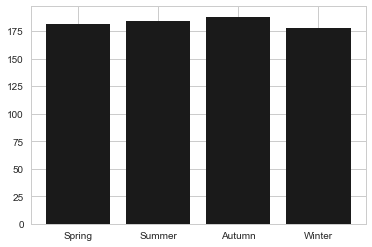

In [11]:
plt.bar(bike_data.Season.unique(), np.array(bike_data.groupby(['Season']).count().Date),
        tick_label=['Spring', 'Summer', 'Autumn', 'Winter'], color = '#1A1A1A');

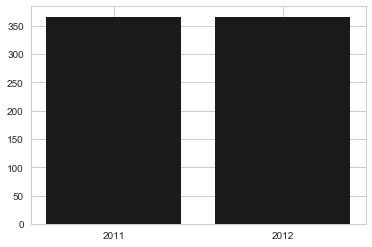

In [12]:
plt.bar(bike_data.Year.unique(), np.array(bike_data.groupby(['Year']).count().Date),
        tick_label=['2011','2012'], color = '#1A1A1A');

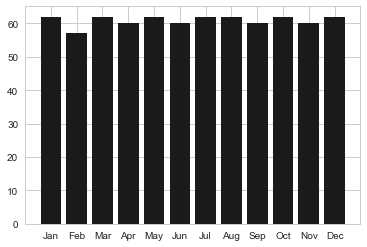

In [13]:
plt.bar(bike_data.Month.unique(), np.array(bike_data.groupby(['Month']).count().Date), 
        tick_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        color = '#1A1A1A');

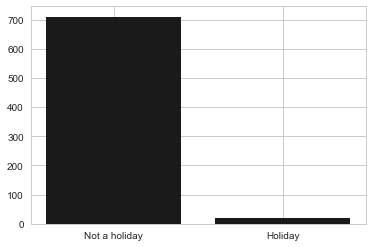

In [14]:
plt.bar(bike_data.Holiday.unique(), np.array(bike_data.groupby(['Holiday']).count().Date), 
        tick_label = ['Not a holiday','Holiday'], color = '#1A1A1A');

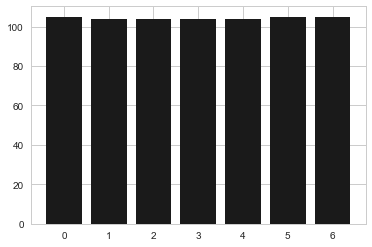

In [15]:
plt.bar(bike_data.Day_of_week.unique(), np.array(bike_data.groupby(['Day_of_week']).count().Date),
        color = '#1A1A1A');

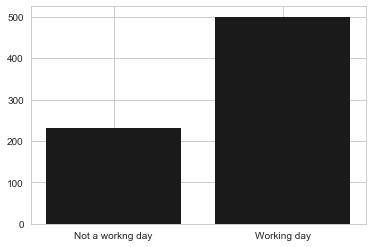

In [16]:
plt.bar(bike_data.Working_day.unique(), np.array(bike_data.groupby(['Working_day']).count().Date), 
        tick_label = ['Not a workng day', 'Working day'], color = '#1A1A1A');

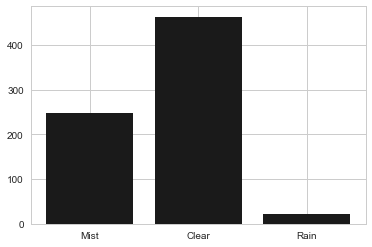

In [17]:
plt.bar(bike_data.Weather_situation.unique(), np.array(bike_data.groupby(['Weather_situation']).count().Date),
        tick_label = ['Clear', 'Mist', 'Rain'],
        color = '#1A1A1A');

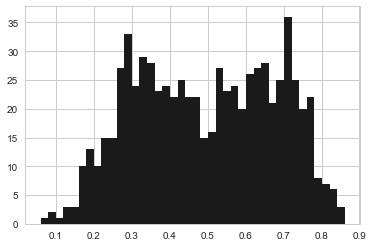

In [18]:
plt.hist(bike_data.Temperature_0, bins=40, color = '#1A1A1A');

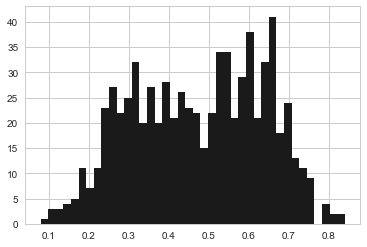

In [19]:
plt.hist(bike_data.Temperature_1, bins=40, color = '#1A1A1A');

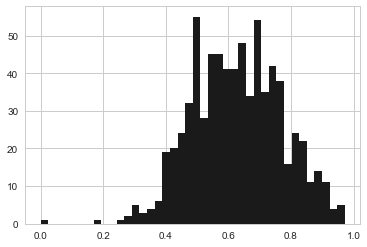

In [20]:
plt.hist(bike_data.Humidity, bins = 40, color = '#1A1A1A');

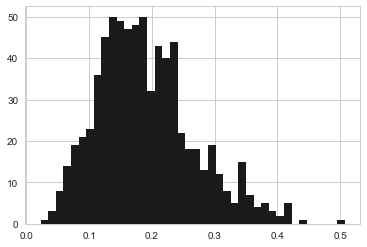

In [21]:
plt.hist(bike_data.Windspeed, bins=40, color = '#1A1A1A');

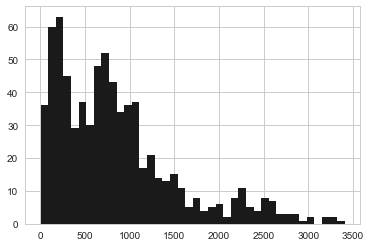

In [22]:
plt.hist(bike_data.Casual_users, bins = 40, color = '#1A1A1A');

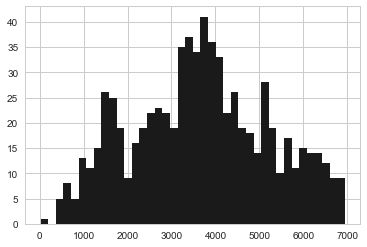

In [23]:
plt.hist(bike_data.Registered_users, bins= 40, color = '#1A1A1A');

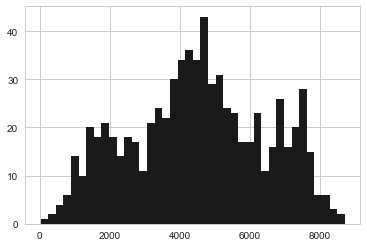

In [24]:
plt.hist(bike_data.Total_count, bins = 40, color = '#1A1A1A');

In [25]:
numerical = [i for i in bike_data.iloc[:,1:15] if (bike_data[i].dtype == 'float64' or bike_data[i].dtype == 'int64')]
categorical = [i for i in bike_data if not (i in numerical or i == 'Date')]

In [26]:
def outlier_analysis():
    for i in numerical:
        maxm, minm = box_analysis(i)
        col_type = neutralizeOutlier(maxm, minm, i)
        bike_data[i] = bike_data[i].astype(col_type)

In [27]:
def box_analysis(i):
    plt.figure()
    print(i)
    sns.boxplot(bike_data[i])
    plt.show()
        
    q1, q3 = np.percentile(bike_data[i], [25,75])
    iqr = q3 - q1
    maxm, minm = q3 + (1.5 * iqr), q1 - (1.5 * iqr)
    return (maxm, minm)

In [28]:
def neutralizeOutlier(maxm, minm, x):
    max_in = bike_data[bike_data[x] > maxm].index
    min_in = bike_data[bike_data[x] < minm].index
    print("\tOutlier above maximum : ", len(max_in))
    print("\tOutlier below minimum : ", len(min_in), "\n\n")
    
    if bike_data[x].dtype == 'int64':
        maxm, minm = round(maxm), round(minm)
    col_type = bike_data[x].dtype
    
    if len(max_in) > 0:
        for i in max_in:
            bike_data[x].iloc[i] = maxm
    
    if len(min_in) > 0:
        for i in min_in:
            bike_data[x].iloc[i] = minm
    
    return col_type

Temperature_0


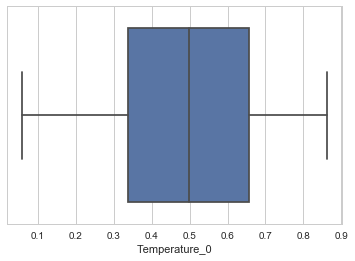

	Outlier above maximum :  0
	Outlier below minimum :  0 


Temperature_1


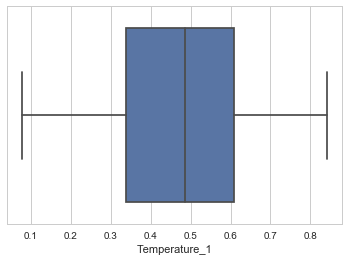

	Outlier above maximum :  0
	Outlier below minimum :  0 


Humidity


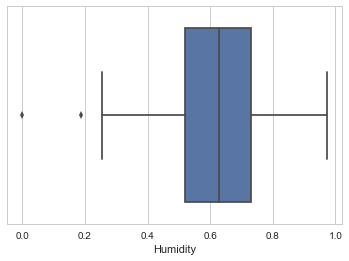

	Outlier above maximum :  0
	Outlier below minimum :  2 


Windspeed


/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


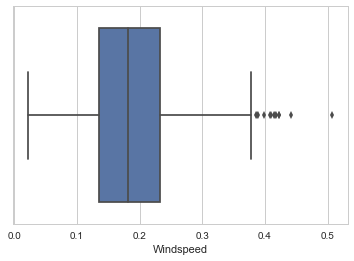

	Outlier above maximum :  13
	Outlier below minimum :  0 


Casual_users


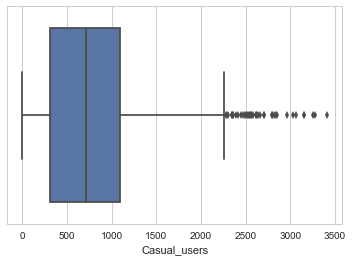

	Outlier above maximum :  44
	Outlier below minimum :  0 


Registered_users


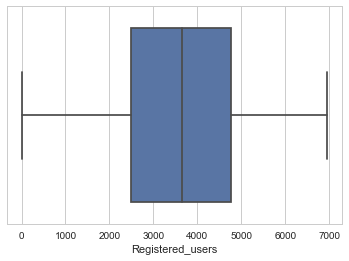

	Outlier above maximum :  0
	Outlier below minimum :  0 


Total_count


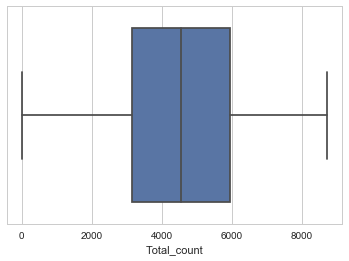

	Outlier above maximum :  0
	Outlier below minimum :  0 




In [29]:
outlier_analysis()

In [30]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
Date                 731 non-null datetime64[ns]
Season               731 non-null category
Year                 731 non-null category
Month                731 non-null category
Holiday              731 non-null category
Day_of_week          731 non-null category
Working_day          731 non-null category
Weather_situation    731 non-null category
Temperature_0        731 non-null float64
Temperature_1        731 non-null float64
Humidity             731 non-null float64
Windspeed            731 non-null float64
Casual_users         731 non-null int64
Registered_users     731 non-null int64
Total_count          731 non-null int64
dtypes: category(7), datetime64[ns](1), float64(4), int64(3)
memory usage: 52.1 KB


In [31]:
def VIF_calculation(df, i):
    a = df.columns.format()
    a.remove(i)
    feat= "+".join(a)
    
    y, X = dmatrices(i + " ~ " + feat, df, return_type='dataframe')
    
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["Features"] = X.columns

    return (vif.round(1))

In [32]:
VIF_calculation(bike_data[numerical], 'Total_count')

,VIF Factor,Features
0,54.0,Intercept
1,63.2,Temperature_0
2,64.1,Temperature_1
3,1.2,Humidity
4,1.2,Windspeed
5,1.6,Casual_users
6,1.6,Registered_users


In [33]:
numerical.remove('Temperature_0')

In [34]:
VIF_calculation(bike_data[numerical], 'Total_count')

,VIF Factor,Features
0,50.5,Intercept
1,1.9,Temperature_1
2,1.2,Humidity
3,1.1,Windspeed
4,1.6,Casual_users
5,1.6,Registered_users


In [35]:
bike_data = bike_data.drop(['Temperature_0', 'Date', 'Casual_users', 'Registered_users'], axis = 1)

In [36]:
y = bike_data['Total_count'].as_matrix().astype(np.float)
X = bike_data.iloc[:,0:10].as_matrix().astype(np.float)
X = StandardScaler().fit_transform(X)

In [37]:
def MAPE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true))*100

In [38]:
def run_algorithm(X, y, X_test, model, model_name):
    reg = model()
    reg.fit(X, y)
    y_new = reg.predict(X_test)
    print(model_name, '\nMean Absolute Percentage Error :{}%\n'.format(MAPE(y_test, y_new)))

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [40]:
run_algorithm(X_train, y_train, X_test, LinearRegression, "LINEAR REGRESSION")
run_algorithm(X_train, y_train, X_test, KNeighborsRegressor, "K NEIGHBOUR REGRESSION")
run_algorithm(X_train, y_train, X_test, SVR, "SUPPORT VECTOR REGRESSION")
run_algorithm(X_train, y_train, X_test, RandomForestRegressor, "RANDOM FOREST REGRESSION")
run_algorithm(X_train, y_train, X_test, DecisionTreeRegressor, "DECISION TREE REGRESSION")

LINEAR REGRESSION 
Mean Absolute Percentage Error :17.639769554226447%

K NEIGHBOUR REGRESSION 
Mean Absolute Percentage Error :21.54896001693943%

SUPPORT VECTOR REGRESSION 
Mean Absolute Percentage Error :62.02001950556525%

RANDOM FOREST REGRESSION 
Mean Absolute Percentage Error :12.102939521422206%

DECISION TREE REGRESSION 
Mean Absolute Percentage Error :16.794852054841115%



In [41]:
model = RandomForestRegressor(max_depth=10, n_estimators=20)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [42]:
y_pred = model.predict(X_test)

In [43]:
print('Mean Absolute Percentage Error :{}%\n'.format(MAPE(y_test, y_pred)))

Mean Absolute Percentage Error :11.779186467645747%



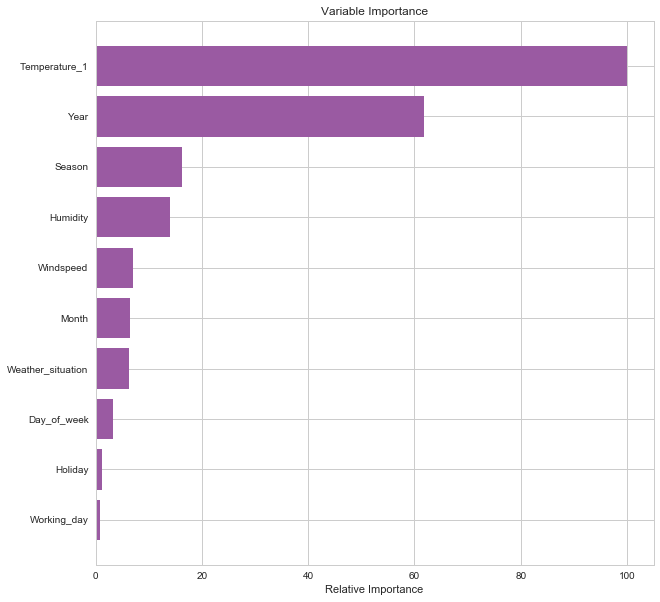

In [48]:
a = model.feature_importances_
a = 100* (a/a.max())
sorted_idx = np.argsort(a)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(10, 10))
plt.barh(pos, a[sorted_idx], align='center', color='#9A5AA2')
plt.yticks(pos, np.asanyarray(bike_data.columns.tolist())[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [44]:
output = pd.Series(y_pred)

In [45]:
output.to_csv("test_output.csv")